In [2]:
import dhlab.module_update as mu
import dhlab.nbtext as nb
mu.update('dhlab_v2', silent = True)
import pandas as pd
import dhlab_v2 as d2

In [3]:
mu.css('css.css')

In [4]:
def show_communities(G, size = 10):
    Gc = gnl.community_dict(G)
    for c in Gc:
        out = "**{name}**: {group}".format(name = c, group = ', '.join(Gc[c][:size]))
        mu.printmd(out)
              

https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb

# NB N-gram

Objekter for tolkning

In [ ]:
http://35.228.68.102.nip.io/

In [5]:
def get_ngram(terms, corpus='bok',lang = 'all', case = 0):
    req = requests.get(
        "http://35.228.68.102.nip.io/ngram_1/ngram/query", params = {
         'lang' : lang,
        'corpus': corpus,
            'terms':terms,
        'case_sens': case
        }
        )
    if req.status_code == 200:
        res = req.text
    else:
        res = "[]"
    return json.loads(res)

In [6]:
import requests
import json

In [7]:
import pandas_alive as pa

In [40]:
check = lambda x:( nb.ngram_conv(get_ngram(x, corpus = 'bok', case = 1, lang= None), years = (1951, 1953), mode ='a').sum().values[0],
d2.ngram_book(word = [x], period = (1951, 1953), lang = None).sum().values[0])

In [42]:
print(check('ikkje'))

(185982.0, 159626)


Wall time: 977 ms


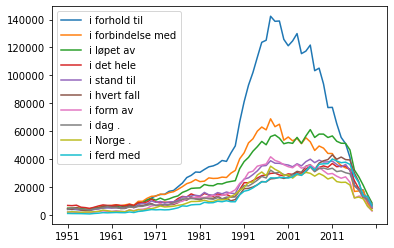

In [91]:
%%time
nb.ngram_conv(get_ngram('i * *', corpus = 'bok', case = 1), years = (1951, 2020), mode ='a').plot()

In [90]:
%%time
nb.nb_ngram('*ing*')

Wall time: 2.18 s


,ingen,ting,betydning,omkring,utvikling,Ingen,stilling,retning,opplysninger,behandling
1810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1812,0.065806,NaN,NaN,0.007197,NaN,0.013367,NaN,NaN,NaN,NaN
1813,0.057261,NaN,NaN,0.010674,NaN,0.012420,NaN,NaN,NaN,NaN
1814,0.052676,NaN,NaN,0.008342,NaN,0.018954,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2006,0.049012,0.021106,0.021442,0.012760,0.016672,0.011807,0.008828,0.008821,0.010464,0.011362
2007,0.049803,0.021991,0.019983,0.012379,0.016064,0.012193,0.008536,0.008634,0.009532,0.010814
2008,0.050129,0.021933,0.019169,0.011728,0.015567,0.013470,0.007893,0.008630,0.008729,0.010631
2009,0.050482,0.021917,0.018577,0.011264,0.015013,0.014801,0.007330,0.008724,0.008658,0.010947


In [11]:
d2.ngram_news(word = ['.', ','], period = (19500101, 19520101)).sum()

,    39236558
.    67364208
dtype: int64

In [ ]:
d2.ngram_periodicals(word = ['.'], period =(1950, 2000)).sum()

In [24]:
%%time
d2.ngram_book(word = ['.'],title = "%krig%", lang="%nob%", period = (1950, 2000)).sum() 

Wall time: 213 ms


.    6179267
dtype: int64

In [94]:
nb.unigram('ikkje').max()

0    279491
dtype: int64

In [11]:
urns = d2.document_corpus(from_year = 2000, to_year=2001)

In [12]:
urns.loc['0']['urn']

'URN:NBN:no-nb_digavis_faedrelandsvennen_null_null_20000519_126_109_1'

In [13]:
d2.urn_collocation(urns = [urns.loc['0']['urn']], word = 'arbeid', before = 60, after = 60).sort_values(by = 'counts', ascending = False).head(20)

,counts,dist,bdist
.,276,59.0,0.212230
",",156,72.0,0.455696
i,116,187.0,1.584746
-,65,225.0,3.358209
er,55,309.0,5.421053
:,52,632.0,11.703704
av,40,40.0,0.952381
for,38,356.0,8.900000
%,34,192.0,5.333333
fra,32,397.0,11.676471


In [14]:
d2.concordance_counts(urns = [urns.loc['0']['urn']], words = 'arbeid').sort_values(by = 'freq', ascending = False).head(20)

,freq
.,651
",",381
og,243
i,194
til,147
-,135
med,120
er,112
av,104
/,90


In [15]:
d2.concordance_counts()

{}

In [16]:
d2.ngram_periodicals(word = ['dosar'], period = ('20200301', '20210801'))

AttributeError: 'Index' object has no attribute 'levels'

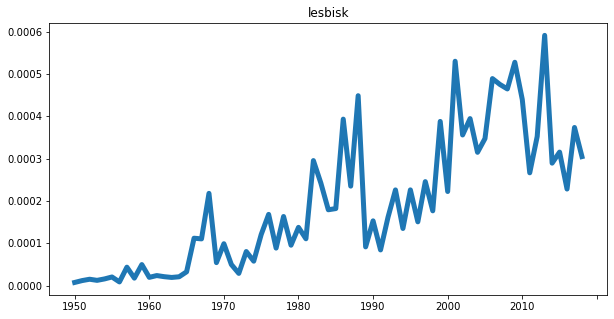

In [110]:
nb.ngram_conv(get_ngram("lesbiske,lesbisk"), years = (1950, 2018)).sum(axis = 1).plot(figsize = (10,5), lw = 5, title = 'lesbisk')

In [17]:
nb.ngram_conv(get_ngram("homoseksuelle, homoseksuell, homofilt, homofil, homofile"), years = (1950, 2018)).sum(axis = 1).plot(
    figsize = (10,5), lw = 5, title = 'homofil++')

ConnectionError: HTTPConnectionPool(host='34.88.151.9', port=80): Max retries exceeded with url: /ngram/query?terms=homoseksuelle,%20homoseksuell,%20homofilt,%20homofil,%20homofile&amp;corpus=avis (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001FEB4B69760>: Failed to establish a new connection: [WinError 10060] Et tilkoblingsforsøk mislyktes fordi den tilkoblede parten ikke svarte på riktig måte etter en tidsperiode, eller den etablerte tilkoblingen mislyktes fordi den tilkoblede verten ikke svarte'))

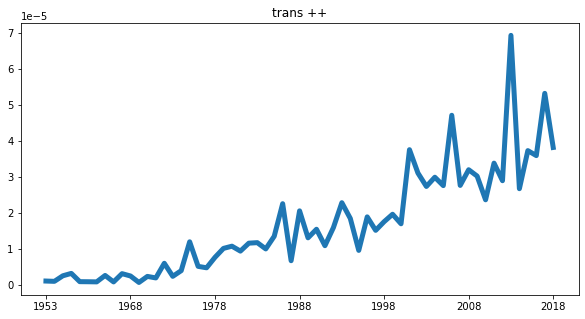

In [179]:
nb.ngram_conv(get_ngram("transkjønnet, transseksuell, transkjønnede, transvestitt"), years = (1950, 2018)).sum(axis = 1).sort_index().plot(
    figsize = (10,5), lw = 5, title = 'trans ++')

In [120]:
import datetime

In [126]:
(datetime.datetime.strptime('20190305', '%Y%m%d').strftime('%Y%m%d'), datetime.datetime.strptime('20200310', '%Y%m%d'))

('20190305', datetime.datetime(2020, 3, 10, 0, 0))

In [142]:
BASE_URL = "https://api.nb.no/ngram/db2"
BASE_URL1 = "https://api.nb.no/ngram/db1"
def ngram_periodicals(word = ['.'], title = None, period = None, publisher = None, lang=None, city = None, ddk = None, topic = None):
    """Get a time series for a word as string, title is name of periodical period is (year, year), lang is three letter iso code.
    Use % as wildcard where appropriate - no wildcards in word and lang"""
    params = locals()
    if isinstance(word, str):
        # assume a comma separated string
        word = [w.strip() for w in word.split(',')]
    params['word'] = tuple(word)
    params = {x:params[x] for x in params if not params[x] is None}
    r = requests.post(BASE_URL1 + "/ngram_periodicals", json = params)
    #print(r.status_code)
    df = pd.DataFrame.from_dict(r.json(), orient = 'index')
    df.index = df.index.map(lambda x: tuple(x.split()))
    columns = df.index.levels[0]
    df = pd.concat([df.loc[x] for x in columns], axis = 1)
    df.columns = columns 
    df.index = df.index.map(pd.Timestamp)
    return df


In [ ]:
ngram_periodicals(word = ['og'], period= (20190101, 20200101))

# Bygg et korpus 

En samling av referanser til tekster via URN


In [20]:
corpus = nb.book_corpus(words="LGBT LGBTQ lgbt lgbtq".split(), period = (1980, 2015), limit = 500000, lang = 'nob')
corpus

,urn,author,title,year
0,2013080908028,"Bakkeli, Vidar",LHBT i arbeidslivet,2013
1,2013080238033,"Fjær, Eivind Grip","Lesbiske, homofile, bifile og transpersoners u...",2013
2,2016022308061,,Å være sammen,2013
3,2015052208209,,Ressurspakke for undervisning om homofili i pr...,2007
4,2012090308006,,Norges innsats for menneskerettighetsforkjempere,2010
5,2014012209078,"Ros, Janneke van der",Alskens folk,2013
6,2015090308026,,Radikal islamisme,2014
7,2014030548109,"Godsk, Frede",Turen går til Skottland,2004
8,2013010705096,"Eggen, Torgrim",Manhattan,2007
9,2015050748024,"Skau, Minna",Turen går til New York,2013


Konkordans for et subkorpus - forskjell fra nb.no

In [29]:
list(corpus.urn)

[2013080908028,
 2013080238033,
 2016022308061,
 2015052208209,
 2012090308006,
 2014012209078,
 2015090308026,
 2014030548109,
 2013010705096,
 2015050748024,
 2012061505045,
 2014022406029,
 2012062905023,
 2013011607316,
 2014032605015,
 2013082806125,
 2014041048030,
 2013041206258]

In [31]:
us = ["URN:NBN:no-nb_digibok_" + str(u) for u in list(corpus.urn)]

In [68]:
%%time
conc = d2.concordance(urns=  ["URN:NBN:no-nb_digibok_" + str(u) for u in list(corpus.urn)], words= "")
len(conc)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [28]:
%%time
conc = d2.concordance(urns=  ["URN:NBN:no-nb_digibok_" + str(u) for u in list(corpus.urn)], words= "NEAR(og i, 60)")
conc.sample(min(len(conc), 10)).style

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [7]:
tot = d2.totals(200000)

# Kollokasjonsanalyse

Hva er assosiert med hva? Hvilke ord er relevant?

In [40]:
tot = nb.frame(nb.totals(200000),'freq')

In [43]:
tot

,freq
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583
...,...
................,3314
utbrutt,3313
tvske,3313
tredemøllen,3313


In [71]:
coll = d2.urn_collocation(urns =  ["URN:NBN:no-nb_digibok_" + str(u) for u in list(corpus.urn)], word = "LGBT")

In [72]:
pd.DataFrame((coll.counts/tot.freq).sort_values(ascending = False)).head(50)

,0
intimate,0.000307
bifile,0.000296
Adjustment,0.000215
Brno,0.000208
Cortina,0.000206
homofilt,0.000202
violence,0.000153
co-workers,0.000143
agi,0.000136
embrace,0.000130


# Hvordan forholder ordene seg til hverandre? 

In [73]:
agg = nb.get_aggregated_corpus([x for x in corpus.urn])

In [74]:
agg.columns =  ['counts']

In [75]:
agg.head()

,counts
",",63862
.,63567
og,39365
i,31353
som,21446


In [76]:
assoc = pd.DataFrame((agg.counts/agg.counts.sum())/(tot.freq/tot.freq.sum()), columns =  ['relevans']).sort_values(by = 'relevans', ascending = False)
assoc.head(20)

,relevans
bifile,1175.064293
Justins,515.796146
EE,454.077416
heterofile,429.748043
kjønnsidentitet,404.964049
Skottlands,385.774184
PARK,369.101536
lø.,344.925541
STEDER,331.153211
Ave,328.022796


In [54]:
words = list(assoc[assoc.relevans > 20].index)

In [55]:
dtm = pd.concat([nb.frame(nb.get_freq(u, top = 0, cutoff = 0), str(u)) for u in nb.pure_urn(corpus)[:20]], axis = 1)

In [56]:
dtm_key = pd.concat([((dtm[x]/dtm[x].sum())/(tot.freq/tot.freq.sum())).sort_values(ascending=False).head(150) for x in dtm], axis = 1)

In [57]:
dtm_key.columns = dtm.columns

# Bygge en dokument-term-matrise  

In [58]:
dtm_key.sort_values(by=dtm_key.columns[10], ascending = False).head(10).fillna(0).style.background_gradient(axis = 1)

,2013080908028,2013080238033,2016022308061,2015052208209,2012090308006,2014012209078,2015090308026,2014030548109,2013010705096,2015050748024,2012061505045,2014022406029,2012062905023,2013011607316,2014032605015,2013082806125,2014041048030,2013041206258
homofil,404.603597,304.984045,0.000000,2835.684311,0.000000,142.146147,0.000000,0.000000,0.000000,0.000000,4835.224138,607.207797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
homofili,0.000000,0.000000,0.000000,3630.142697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3168.063651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,114.667965
heterofile,3036.166672,5797.827994,0.000000,2942.298656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2799.034166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
homofiles,0.000000,0.000000,0.000000,650.304225,0.000000,176.030348,0.000000,0.000000,0.000000,0.000000,2539.479158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
homofile,1115.592976,1642.261509,0.000000,2371.157826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2083.812435,590.902327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
homofilt,0.000000,0.000000,0.000000,988.242114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1117.121790,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lilleborg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,998.883331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
diskrimineringen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,854.556811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Skjetten,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,750.389889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Homofile,561.091686,169.176956,0.000000,1864.267291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,718.429121,288.705219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
graph = dtm_key.fillna(0).dot(dtm_key.fillna(0).transpose())

# Grafanalyse av DTM 

Her gjøres det lokalt

In [60]:
import networkx as nx
G = nx.from_pandas_adjacency(graph)

In [61]:
import dhlab.graph_networkx_louvain as gnl

In [62]:
Gf = nx.from_edgelist([(u,v, e) for u,v,e in G.edges(data=True) if e['weight'] > 1000000])

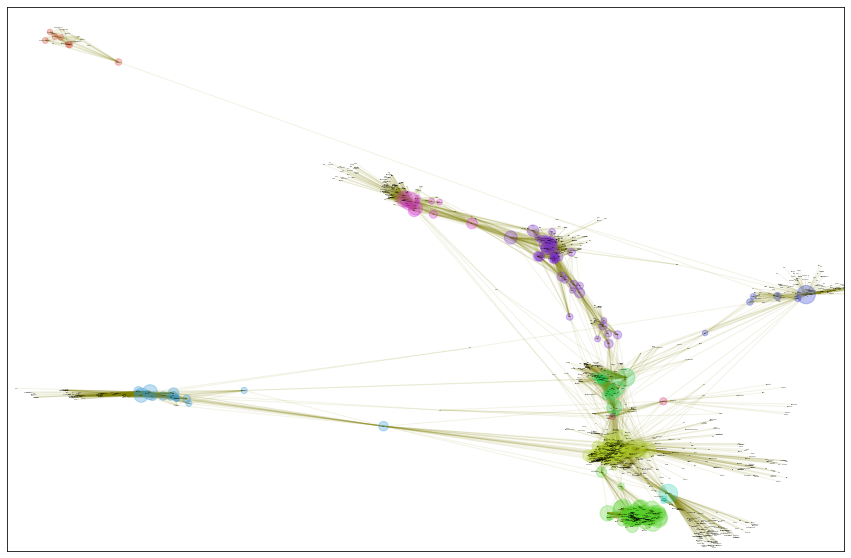

In [63]:
gnl.show_graph(Gf, spread = 0.2, fontsize = 1)

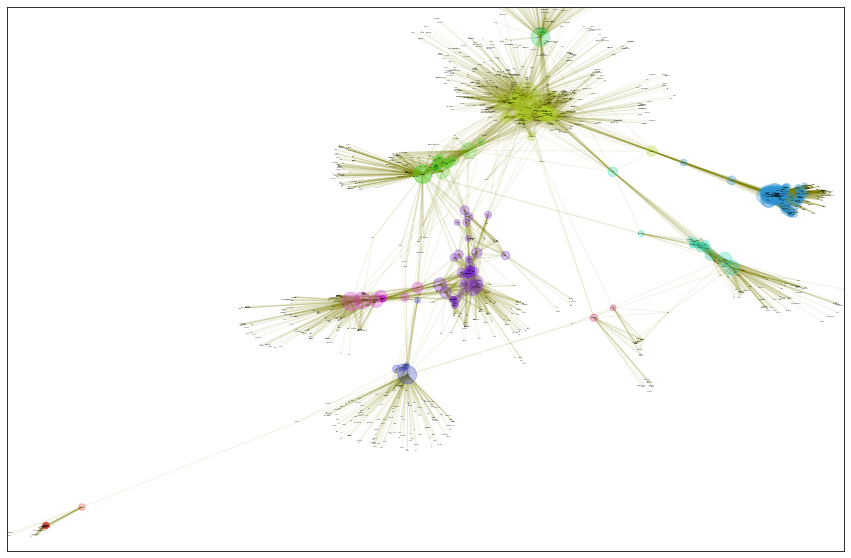

In [70]:
gnl.show_graph(Gf, spread = 0.8, fontsize = 1)

In [64]:
show_communities(Gf)

**bifile-heterofile**: bifile, heterofile, lesbiske, utsatthet, homofil, homofile, homofili, Moseng, Hentet, Grønningsæter

**TV-serie-TOPP**: TV-serie, TOPP, Gay, FASIT, HVILKEN, Kylie, Dolce, BILDET, duoen, Galla

**kjønnsidentitet-helsetilbud**: kjønnsidentitet, helsetilbud, SOC, hormonbehandling, 64.0, Benestad, mestringsstrategier, narrativer, tematikken, Informantenes

**Hamas-kalifatet**: Hamas, kalifatet, Riyadh, 2013, Brorskapet, Terrorism, 2014, 2013., jihad, islamistiske

**rights-imprisoned**: rights, imprisoned, missions, commissions, diplomatic, Missions, non-governmental, dialogues, Checklist, consultations

**Justins-Justin**: Justins, Justin, fansen, Stratford, Forever, Bono, Usher, velsignelsene, Promise, Braun

**EE-STEDER**: EE, STEDER, Ave, PARK, lø., VERDT, Coney, Yorks, Battery, Bronx

**Skottlands-09.30**: Skottlands, 09.30, Inverness, 0131, sø., dgl, Princes, Highland, Highlands, Loch

**populærkultur-intimitet**: populærkultur, intimitet, intimiteten, Deleuze, Beckham, Wencke, seksualitetens, foreldreskap, Thuen, 2012.

**personvern-personvernet**: personvern, personvernet, Personvern, personopplysningsloven, helseregistre, Individ, autentisering, Datatilsynets, Privacy, personopplysninger

**hijab-trosfrihet**: hijab, trosfrihet, FIFA, omskjæring, Rona